In [ ]:
# BASIC LEVEL QUERIES

# List all customers along with their corresponding city and state

In [4]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
SELECT customer_id, customer_city, customer_state
FROM dbo.Customers
ORDER BY customer_id;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

customers_df = pd.read_sql(query, conn)

# Show top few rows
print(customers_df.head())
print(f"Total customers: {len(customers_df)}")

                        customer_id customer_city customer_state
0  00012a2ce6f8dcda20d059ce98491703        osasco             SP
1  00012a2ce6f8dcda20d059ce98491703        osasco             SP
2  000161a058600d5901f007fab4c27140   itapecerica             MG
3  000161a058600d5901f007fab4c27140   itapecerica             MG
4  0001fd6190edaaf884bcaf3d49edf079  nova venecia             ES
Total customers: 198882


# Retrieve all product categories with their prices

                 product_category   price
161212  Agro Industria e Comercio  2990.0
136396  Agro Industria e Comercio  2399.0
45760   Agro Industria e Comercio  2199.0
185700  Agro Industria e Comercio  1899.0
96564   Agro Industria e Comercio  1476.3
208808  Agro Industria e Comercio  1390.0
208809  Agro Industria e Comercio  1330.0
141446  Agro Industria e Comercio  1234.0
212190  Agro Industria e Comercio  1180.0
182906  Agro Industria e Comercio   989.1


<Figure size 1400x800 with 0 Axes>

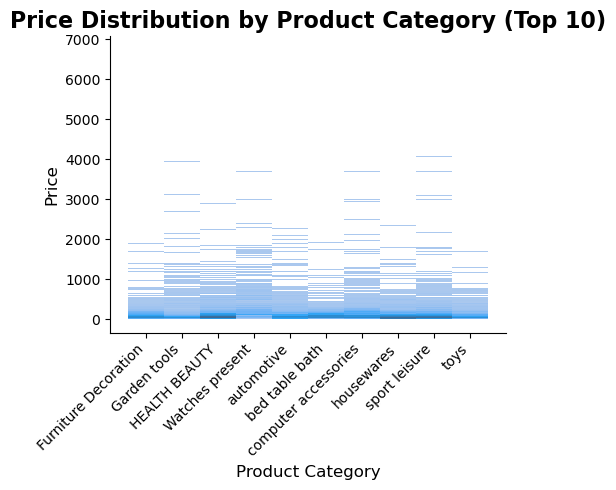

In [7]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
SELECT DISTINCT p.product_category, o.price
FROM Products p JOIN Order_Items o
ON p.product_id = o.product_id;

"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Read both tables
df_products = pd.read_sql("SELECT * FROM products", conn)
df_order_items = pd.read_sql("SELECT * FROM order_items", conn)

# Merge and get distinct combinations
df_category_prices = df_products.merge(df_order_items, on='product_id')[['product_category', 'price']].drop_duplicates()
df_category_prices = df_category_prices.sort_values(['product_category', 'price'], ascending=[True, False])

print(df_category_prices.head(10))

# Box plot to show price distribution by category
plt.figure(figsize=(14, 8))
top_categories = df_category_prices['product_category'].value_counts().head(10).index
df_top = df_category_prices[df_category_prices['product_category'].isin(top_categories)]

sns.displot(data=df_top, x='product_category', y='price', palette='Set2')
plt.title('Price Distribution by Product Category (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Display all unique payment methods used by customers

In [9]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
SELECT DISTINCT 
    payment_type,
    COUNT(*) OVER (PARTITION BY payment_type) as usage_count
FROM payments
ORDER BY usage_count DESC;

"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Read payments table
df_payments = pd.read_sql("SELECT * FROM payments", conn)

# Get unique payment types with counts
payment_summary = df_payments['payment_type'].value_counts().reset_index()
payment_summary.columns = ['payment_type', 'usage_count']

print("Unique Payment Methods:")
print(payment_summary)




Unique Payment Methods:
  payment_type  usage_count
0  credit_card       153590
1          UPI        39568
2      voucher        11550
3   debit_card         3058
4  not_defined            6


# Find the total number of sellers operating in each state

Sellers by State:
   seller_state  total_sellers
22           SP           1849
15           PR            349
8            MG            244
20           SC            190
16           RJ            171
19           RS            129
6            GO             40
4            DF             30
5            ES             23
2            BA             19
3            CE             13
13           PE              9
12           PB              6
9            MS              5
17           RN              5
10           MT              4
18           RO              2
21           SE              2
1            AM              1
0            AC              1
14           PI              1
7            MA              1
11           PA              1


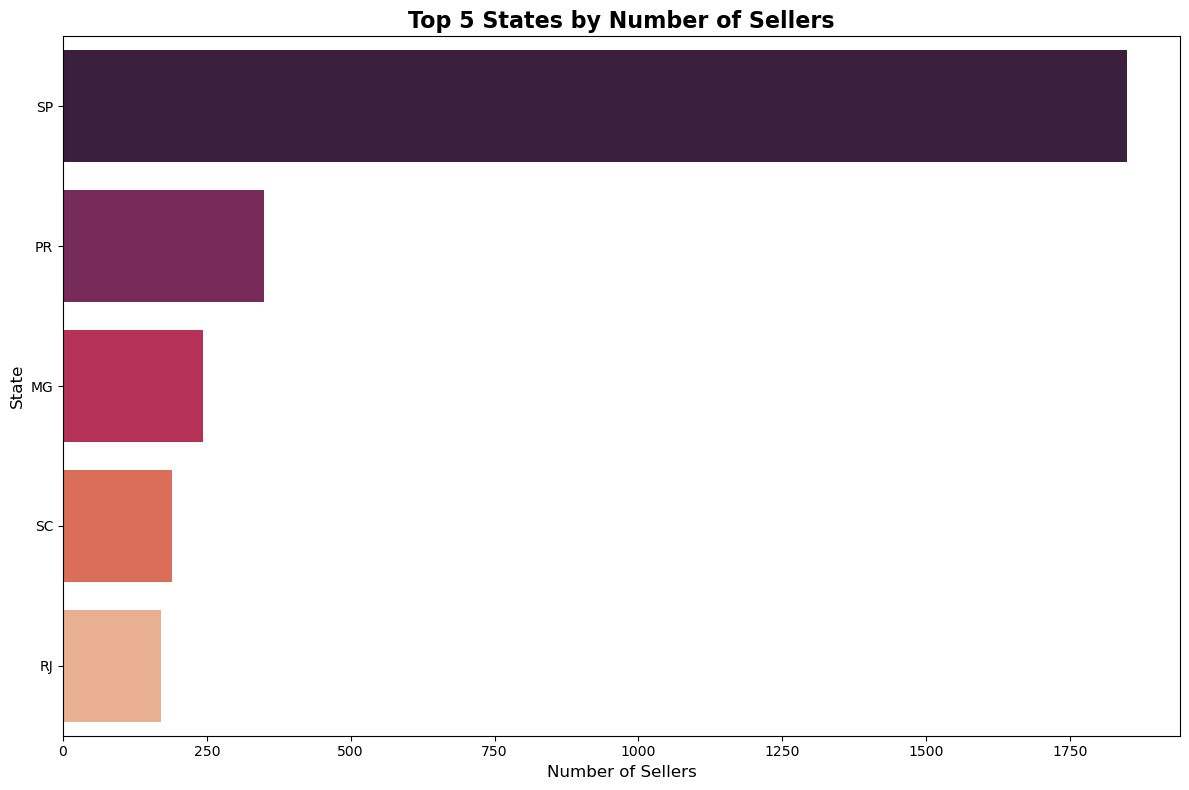

In [12]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
SELECT 
    seller_state,
    COUNT(DISTINCT seller_id) AS total_sellers    
FROM sellers
GROUP BY seller_state
ORDER BY total_sellers DESC;

"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Read sellers table
df_sellers = pd.read_sql("SELECT * FROM sellers", conn)

# Group by state and count unique sellers
seller_distribution = df_sellers.groupby('seller_state')['seller_id'].nunique().reset_index()
seller_distribution.columns = ['seller_state', 'total_sellers']
seller_distribution = seller_distribution.sort_values('total_sellers', ascending=False)

print("Sellers by State:")
print(seller_distribution)

# Horizontal bar chart for top states
plt.figure(figsize=(12, 8))
top_states = seller_distribution.head(5)

sns.barplot(data=top_states, y='seller_state', x='total_sellers', palette='rocket')
plt.title('Top 5 States by Number of Sellers', fontsize=16, fontweight='bold')
plt.xlabel('Number of Sellers', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()



# List all orders placed in the last quarter of 2017

In [17]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
SELECT 
    order_status,
    order_purchase_timestamp,
    MONTH(order_purchase_timestamp) AS purchase_month,
    DAY(order_purchase_timestamp) AS purchase_day
FROM orders
WHERE order_purchase_timestamp >= '2017-10-01' 
  AND order_purchase_timestamp < '2018-01-01'
  AND order_status NOT IN ('canceled', 'unavailable')
  ORDER BY order_purchase_timestamp;

"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Read orders table
df_orders = pd.read_sql("SELECT * FROM orders", conn)

# Convert to datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Filter Q4 2017
q4_2017 = df_orders[(df_orders['order_purchase_timestamp'] >= '2017-10-01') & 
                     (df_orders['order_purchase_timestamp'] < '2018-01-01') &
                     (~df_orders['order_status'].isin(['canceled', 'unavailable']))]

# Add month and day columns
q4_2017['purchase_month'] = q4_2017['order_purchase_timestamp'].dt.month
q4_2017['purchase_day'] = q4_2017['order_purchase_timestamp'].dt.day

print(f"Total Q4 2017 Orders placed were: {len(q4_2017)}")
print(q4_2017[['order_status', 'order_purchase_timestamp']])


Total Q4 2017 Orders placed were: 35180
       order_status order_purchase_timestamp
0         delivered      2017-10-02 10:56:33
3         delivered      2017-11-18 19:28:06
17        delivered      2017-12-26 23:41:31
18        delivered      2017-11-21 00:03:41
19        delivered      2017-10-26 15:54:26
...             ...                      ...
198865    delivered      2017-11-21 20:18:03
198870    delivered      2017-11-05 16:17:53
198872    delivered      2017-10-27 15:21:00
198873    delivered      2017-12-20 09:52:41
198874    delivered      2017-10-04 19:57:37

[35180 rows x 2 columns]


# Identify the top 5 cities with the most registered customers

Top 5 Cities by Customer Count:
       customer_city  customer_count  percentage_of_total
3597       sao paulo           31080                15.63
3155  rio de janeiro           13764                 6.92
453   belo horizonte            5546                 2.79
558         brasilia            4262                 2.14
1143        curitiba            3042                 1.53


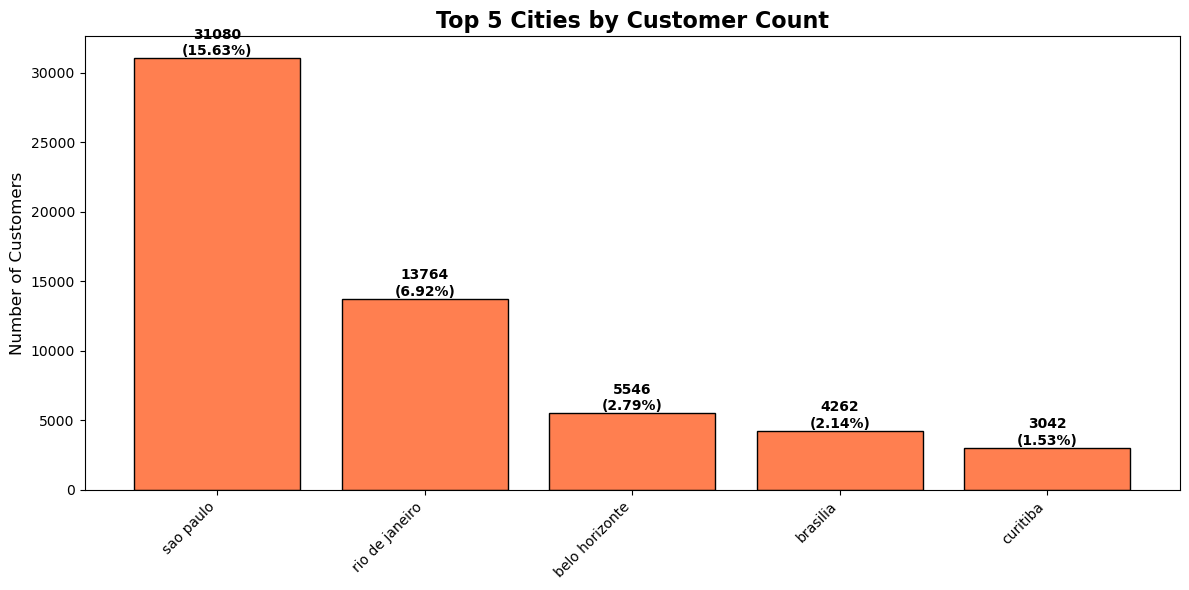

In [19]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
  SELECT TOP 5
    customer_city,
    COUNT(customer_id) AS customer_count,
    CAST(COUNT(customer_id) * 100.0 / SUM(COUNT(customer_id)) OVER () AS DECIMAL(5,2)) AS percentage_of_total
FROM customers
GROUP BY customer_city
ORDER BY customer_count DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Read customers table
df_customers = pd.read_sql("SELECT * FROM customers", conn)

# Group by city and state
city_distribution = df_customers.groupby(['customer_city']).size().reset_index(name='customer_count')

# Calculate percentage
city_distribution['percentage_of_total'] = (city_distribution['customer_count'] / city_distribution['customer_count'].sum() * 100).round(2)

# Get top 5
top_5_cities = city_distribution.sort_values('customer_count', ascending=False).head(5)

print("Top 5 Cities by Customer Count:")
print(top_5_cities)


# Bar chart with percentages
fig, ax = plt.subplots(figsize=(12, 6))

cities_labels = top_5_cities['customer_city'] 
bars = ax.bar(range(len(top_5_cities)), top_5_cities['customer_count'], color='coral', edgecolor='black')

# Add percentage labels on bars
for i, (count, pct) in enumerate(zip(top_5_cities['customer_count'], top_5_cities['percentage_of_total'])):
    ax.text(i, count, f'{count}\n({pct}%)', ha='center', va='bottom', fontweight='bold')

ax.set_xticks(range(len(top_5_cities)))
ax.set_xticklabels(cities_labels, rotation=45, ha='right')
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Top 5 Cities by Customer Count', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Display the total quantity of each product sold

In [25]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
  SELECT 
    p.product_category,
    COUNT(oi.order_item_id) AS total_quantity_sold,
    SUM(oi.price) AS total_revenue
FROM order_items oi
LEFT JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category
ORDER BY total_quantity_sold DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Read tables
df_order_items = pd.read_sql("SELECT * FROM order_items", conn)
df_products = pd.read_sql("SELECT product_id, product_category FROM products", conn)

# Merge and aggregate
product_sales = df_order_items.groupby('product_id').agg(
    total_quantity_sold=('order_item_id', 'count'),
    total_revenue=('price', 'sum')
    ).reset_index()

# Add category information
product_sales = product_sales.merge(df_products, on='product_id', how='left')

# Sort by quantity
product_sales = product_sales.sort_values('total_quantity_sold', ascending=False)

print("Product Sales Summary:")
print(product_sales.head(20))



Product Sales Summary:
                             product_id  total_quantity_sold  total_revenue  \
44224  aca2eb7d00ea1a7b8ebd4e68314663af                 1054       75217.80   
44225  aca2eb7d00ea1a7b8ebd4e68314663af                 1054       75217.80   
39485  99a4788cb24856965c36a24e339b6058                  976       86051.12   
39484  99a4788cb24856965c36a24e339b6058                  976       86051.12   
17226  422879e10f46682990de24d770e7f83d                  968       53154.44   
17227  422879e10f46682990de24d770e7f83d                  968       53154.44   
14728  389d119b48cf3043d311335e499d9c6b                  784       42881.18   
14729  389d119b48cf3043d311335e499d9c6b                  784       42881.18   
14159  368c6c730842d78016ad823897a372db                  776       42113.60   
14158  368c6c730842d78016ad823897a372db                  776       42113.60   
21680  53759a2ecddad2bb87a079a1f1519f73                  746       40774.40   
21681  53759a2ecddad2bb87a079

In [ ]:
# INTERMEDIATE LEVEL QUERIES

# Calculate the total revenue per product category.

In [7]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
  SELECT 
    p.product_category,
    ROUND(SUM(oi.price + oi.freight_value), 2) AS total_revenue
FROM order_items AS oi
JOIN products AS p 
ON oi.product_id = p.product_id
GROUP BY p.product_category
ORDER BY total_revenue DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Read tables
order_items = pd.read_sql("SELECT * FROM order_items", conn)
products = pd.read_sql("SELECT * FROM products", conn)

# Merge and aggregate
merged_df = pd.merge(order_items, products, on="product_id")
merged_df["total_value"] = merged_df["price"] + merged_df["freight_value"]

revenue_per_category = (
    merged_df.groupby("product_category")["total_value"]
    .sum()
    .round(2)
    .reset_index()
    .sort_values(by="total_value", ascending=False)
)

print(revenue_per_category.head(5))




        product_category  total_value
30         HEALTH BEAUTY  12971232.63
45       Watches present  11749874.49
49        bed table bath  11175135.48
68         sport leisure  10409908.32
53  computer accessories   9533451.60


# Find the average order value per customer.

                            customer_id  order_total
8475   1617b1357756262bfa56ab541c47bc16     40992.24
91284  ec5b2ba62e574342386871631fafd3fc     21824.64
76948  c6e2731c5b391845f6800c97401a43a9     20787.93
94398  f48d464a0baaea338cb25f816991ab1f     20766.63
24603  3fd6777bbce08a352fddd04e4a7cc8f6     20179.98
2049   05455dfa7cd02f13d132aa7a6a9729c6     18244.62
86248  df55c14d1476a9a3467f131269c2477f     14851.02
86733  e0a2412720e9ea4f26c1ac985f6a7358     14428.32
14182  24bbf5fd2f2e1b359ee7de94defc4a15     14293.02
23771  3d979689f636322c62418b6346b1c6d2     14045.34


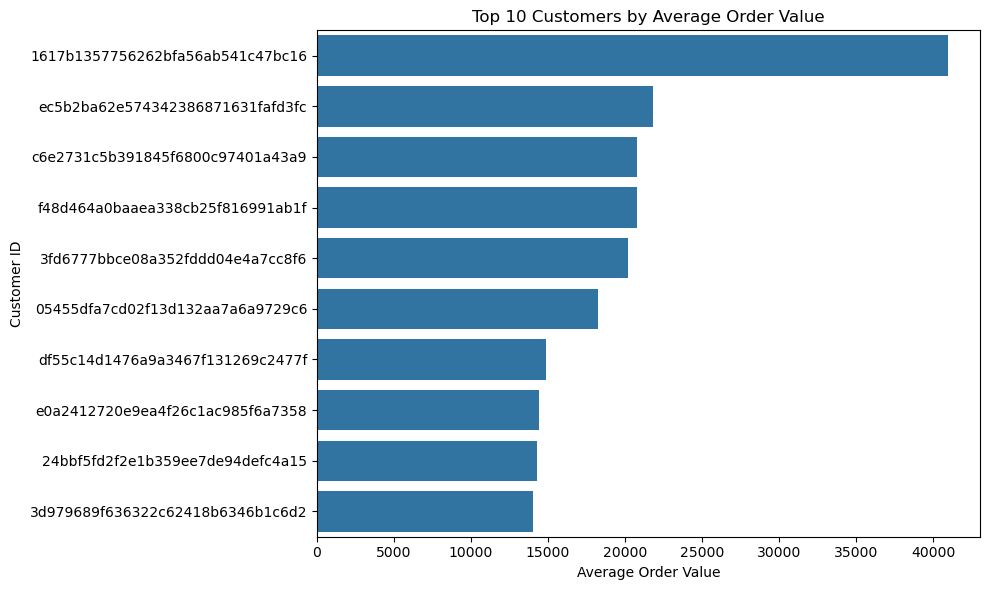

In [3]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
  SELECT TOP 10 c.customer_id,
    ROUND(AVG(order_total), 2) AS avg_order_value
FROM 
(
    SELECT o.order_id, o.customer_id,
        SUM(oi.price + oi.freight_value) AS order_total
    FROM orders AS o
    JOIN order_items AS oi 
    ON o.order_id = oi.order_id
    GROUP BY o.order_id, o.customer_id
) AS os
JOIN customers AS c 
ON os.customer_id = c.customer_id
GROUP BY c.customer_id
ORDER BY avg_order_value DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

orders = pd.read_sql("SELECT * FROM orders", conn)
order_items = pd.read_sql("SELECT * FROM order_items", conn)
customers = pd.read_sql("SELECT * FROM customers", conn)

# Step 1: Calculate total value per order
order_totals = order_items.groupby("order_id")[["price", "freight_value"]].sum()
order_totals["order_total"] = order_totals["price"] + order_totals["freight_value"]
order_totals = order_totals.reset_index()[["order_id", "order_total"]]

# Step 2: Merge with orders and customers
merged = orders.merge(order_totals, on="order_id").merge(customers, on="customer_id")

# Step 3: Calculate average order value per customer
avg_order_value = (
    merged.groupby("customer_id")["order_total"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="order_total", ascending=False)
)

print(avg_order_value.head(10))


import seaborn as sns
import matplotlib.pyplot as plt

top_customers = avg_order_value.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="order_total", y="customer_id", data=top_customers)
plt.title("Top 10 Customers by Average Order Value")
plt.xlabel("Average Order Value")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


# Determine which payment type contributes the highest total revenue.

  payment_type  payment_value
1  credit_card    37626252.57
0          UPI     8608083.81
4      voucher     1138310.61
2   debit_card      653969.37
3  not_defined           0.00


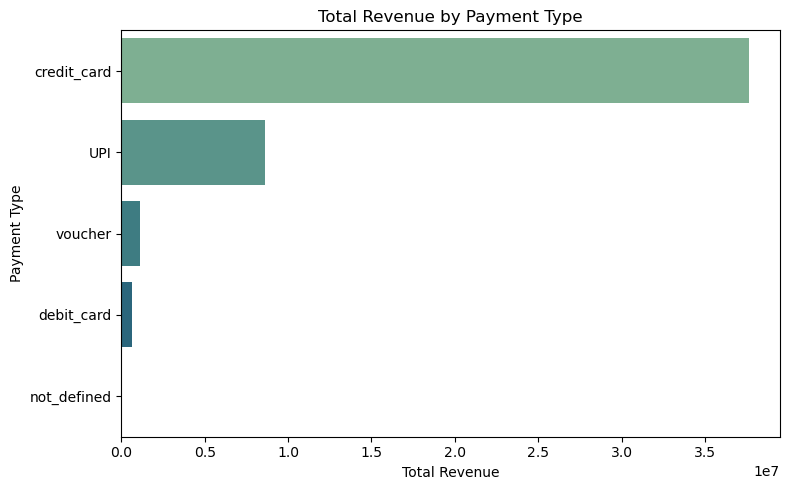

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
  SELECT pmt.payment_type,
    ROUND(SUM(pmt.payment_value), 2) AS total_revenue
FROM payments AS pmt
GROUP BY pmt.payment_type
ORDER BY total_revenue DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')


# Load payments data
payments = pd.read_sql("SELECT * FROM payments", conn)

# Calculate total revenue per payment type
revenue_by_payment = (
    payments.groupby("payment_type")["payment_value"]
    .sum()
    .round(2)
    .reset_index()
    .sort_values(by="payment_value", ascending=False)
)

print(revenue_by_payment)




plt.figure(figsize=(8,5))
total_payments = revenue_by_payment
sns.barplot(x="payment_value", y="payment_type", data=total_payments, palette="crest")
plt.title("Total Revenue by Payment Type")
plt.xlabel("Total Revenue")
plt.ylabel("Payment Type")
plt.tight_layout()
plt.show()


# Show the top 10 best-selling products in year 2017.

      product_category  Total_Units_Sold_2017
31091   bed table bath                   3231
31089   bed table bath                   3231
31090   bed table bath                   3231
13470     Garden tools                   2484
13471     Garden tools                   2484
13472     Garden tools                   2484
4402     HEALTH BEAUTY                   2025
4403     HEALTH BEAUTY                   2025
4401     HEALTH BEAUTY                   2025
11506     Garden tools                   1971


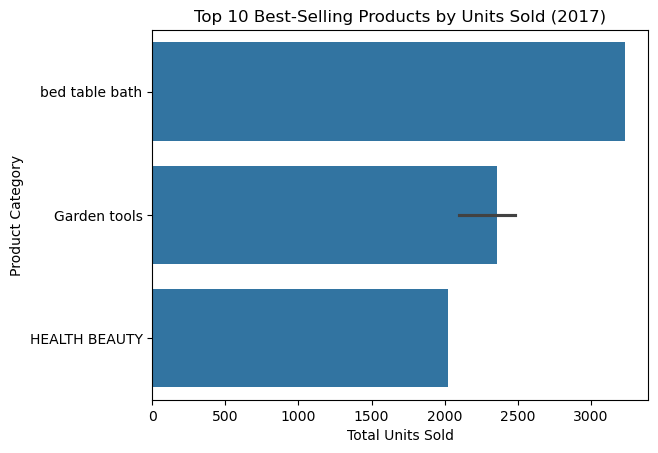

In [5]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
SELECT TOP 10 
    p.product_id,
    p.product_category,
    sales_per_product.total_units_sold
FROM products AS p
INNER JOIN (
    SELECT 
        oi.product_id,
        COUNT(oi.order_item_id) AS total_units_sold
    FROM order_items AS oi
    INNER JOIN orders AS o 
        ON oi.order_id = o.order_id
    WHERE YEAR(o.order_purchase_timestamp) = 2017
    GROUP BY oi.product_id
) AS sales_per_product
    ON p.product_id = sales_per_product.product_id
ORDER BY 
    sales_per_product.total_units_sold DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')


orders_df = pd.read_sql("SELECT * FROM orders", conn)
order_items_df = pd.read_sql("SELECT * FROM order_items", conn)
products_df = pd.read_sql("SELECT * FROM products", conn)

orders_df['order_purchase_timestamp'] = pd.to_datetime(
    orders_df['order_purchase_timestamp'])

orders_2017_df = orders_df[
    orders_df['order_purchase_timestamp'].dt.year == 2017
][['order_id', 'customer_id']]

order_product_2017_df = pd.merge(
    orders_2017_df,
    order_items_df[['order_id', 'product_id', 'order_item_id']],
    on='order_id',
    how='inner'
)

product_sales_2017 = order_product_2017_df.groupby('product_id').agg(
    Total_Units_Sold_2017=('order_item_id', 'count')
).reset_index()

final_sales_df = pd.merge(
    product_sales_2017,
    products_df[['product_id', 'product_category']],
    on='product_id',
    how='inner'
)

top_10_selling_products_2017 = final_sales_df.sort_values(
    by='Total_Units_Sold_2017',
    ascending=False
).head(10)

print(top_10_selling_products_2017[['product_category', 'Total_Units_Sold_2017']])

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=top_10_selling_products_2017,
    x='Total_Units_Sold_2017',
    y='product_category'
)
plt.title('Top 10 Best-Selling Products by Units Sold (2017)')
plt.xlabel('Total Units Sold')
plt.ylabel('Product Category')
plt.show()

# Find the number of orders handled by each seller and rank them.

In [8]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
   SELECT 
    seller_orders.seller_id,
    seller_orders.total_orders,
    RANK() OVER (ORDER BY  seller_orders.total_orders DESC) AS seller_rank
FROM (
    SELECT 
        oi.seller_id,
        COUNT(DISTINCT oi.order_id) AS total_orders
    FROM order_items AS oi
    GROUP BY oi.seller_id
) AS seller_orders
JOIN sellers AS s
    ON seller_orders.seller_id = s.seller_id
    ORDER BY 
    seller_orders.total_orders DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')


# Load CSVs
order_items = pd.read_sql("SELECT * FROM order_items", conn)
sellers = pd.read_sql("SELECT seller_id FROM sellers", conn)

# Count distinct orders handled by each seller
seller_orders = (
    order_items.groupby('seller_id')['order_id']
    .nunique()
    .reset_index(name='total_orders')
)

# Merge with sellers data for city/state info
seller_summary = pd.merge(seller_orders, sellers, on='seller_id', how='left')

# Rank sellers by total orders handled
seller_summary['seller_rank'] = seller_summary['total_orders'].rank(method='dense', ascending=False).astype(int)

# Sort and display
seller_summary = seller_summary.sort_values(by='total_orders', ascending=False)
print(seller_summary.head(10))


                             seller_id  total_orders  seller_rank
3705  6560211a19b47992c3666cc44a7e94c0          1854            1
3707  6560211a19b47992c3666cc44a7e94c0          1854            1
3706  6560211a19b47992c3666cc44a7e94c0          1854            1
2644  4a3ca9315b744ce9f8e9374361493884          1806            2
2643  4a3ca9315b744ce9f8e9374361493884          1806            2
2645  4a3ca9315b744ce9f8e9374361493884          1806            2
7445  cc419e0650a3c5ba77189a1882b7556a          1706            3
7443  cc419e0650a3c5ba77189a1882b7556a          1706            3
7444  cc419e0650a3c5ba77189a1882b7556a          1706            3
1104  1f50f920176fa81dab994f9023523100          1404            4


# Calculate the monthly sales trend for the year 2018.

   sales_month  total_sales
0            1   9965717.01
1            2   8882180.64
2            3  10396141.38
3            4  10437282.36
4            5  10348036.38
5            6   9204093.99
6            7   9528552.27
7            8   9029776.23
8            9      1498.14


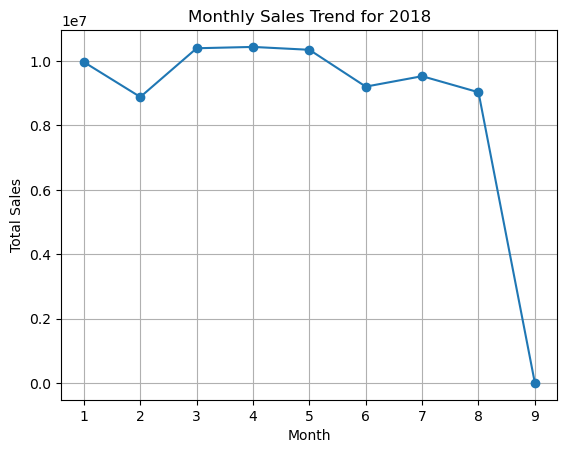

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
   SELECT 
    YEAR(o.order_purchase_timestamp) AS sales_year,
    MONTH(o.order_purchase_timestamp) AS sales_month,
    SUM(oi.price + oi.freight_value) AS total_sales
FROM 
    orders AS o
INNER JOIN 
    order_items AS oi 
    ON o.order_id = oi.order_id
WHERE 
    YEAR(o.order_purchase_timestamp) = 2018
GROUP BY 
    YEAR(o.order_purchase_timestamp),
    MONTH(o.order_purchase_timestamp)
ORDER BY MONTH(o.order_purchase_timestamp);
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Load data
orders = pd.read_sql("SELECT * FROM orders", conn, parse_dates=['order_purchase_timestamp'])
order_items = pd.read_sql("SELECT * FROM order_items", conn)

# Filter for 2018 orders
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]

# Merge orders with order_items
merged_df = pd.merge(order_items, orders_2018, on='order_id', how='inner')

# Create a month column
merged_df['sales_month'] = merged_df['order_purchase_timestamp'].dt.month

# Calculate total monthly sales
monthly_sales = (
    merged_df.groupby('sales_month')
    .apply(lambda x: (x['price'] + x['freight_value']).sum())
    .reset_index(name='total_sales')
    .sort_values('sales_month')
)

print(monthly_sales)

import matplotlib.pyplot as plt

plt.plot(monthly_sales['sales_month'], monthly_sales['total_sales'], marker='o')
plt.title('Monthly Sales Trend for 2018')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Determine the correlation between product price and number of items sold (using Python libraries).

In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

# Load data
order_items = pd.read_sql("SELECT * FROM order_items", conn)
products = pd.read_sql("SELECT * FROM products", conn)

# Merge product and order item data
merged_df = pd.merge(order_items, products, on='product_id', how='left')

# Calculate total items sold per product
product_sales = merged_df.groupby('product_id')['order_item_id'].count().reset_index(name='total_items_sold')

# Get average price per product
avg_price = merged_df.groupby('product_id')['price'].mean().reset_index(name='avg_price')

# Merge sales count and average price
price_sales_corr = pd.merge(product_sales, avg_price, on='product_id', how='inner')

# Compute correlation coefficient
correlation_value = price_sales_corr['avg_price'].corr(price_sales_corr['total_items_sold'])

print(f"Correlation between product price and total items sold: {correlation_value:.4f}")



Correlation between product price and total items sold: -0.0321


In [ ]:
# ADVANCED LEVEL QUERIES

# Calculate the customer lifetime value (CLV) based on total purchases.

In [3]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
     WITH customer_revenue AS (
    SELECT 
        o.customer_id,
        SUM(oi.price + oi.freight_value) AS customer_lifetime_value
    FROM 
        orders AS o
    INNER JOIN 
        order_items AS oi 
        ON o.order_id = oi.order_id
    GROUP BY 
        o.customer_id
)
SELECT 
    customer_id,
    customer_lifetime_value
FROM 
    customer_revenue
ORDER BY 
    customer_lifetime_value DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

# Load CSVs
orders = pd.read_sql("SELECT * FROM orders", conn)
order_items = pd.read_sql("SELECT * FROM order_items", conn)

# Merge orders with order_items
merged_df = pd.merge(order_items, orders, on='order_id', how='inner')

# Calculate CLV per customer
customer_revenue = (
    merged_df.groupby('customer_id')
    .apply(lambda x: (x['price'] + x['freight_value']).sum())
    .reset_index(name='customer_lifetime_value')
)

# Sort by CLV descending
customer_revenue = customer_revenue.sort_values(by='customer_lifetime_value', ascending=False)

print(customer_revenue.head(10))


                            customer_id  customer_lifetime_value
8475   1617b1357756262bfa56ab541c47bc16                122976.72
91284  ec5b2ba62e574342386871631fafd3fc                 65473.92
76948  c6e2731c5b391845f6800c97401a43a9                 62363.79
94398  f48d464a0baaea338cb25f816991ab1f                 62299.89
24603  3fd6777bbce08a352fddd04e4a7cc8f6                 60539.94
2049   05455dfa7cd02f13d132aa7a6a9729c6                 54733.86
86248  df55c14d1476a9a3467f131269c2477f                 44553.06
86733  e0a2412720e9ea4f26c1ac985f6a7358                 43284.96
14182  24bbf5fd2f2e1b359ee7de94defc4a15                 42879.06
23771  3d979689f636322c62418b6346b1c6d2                 42136.02


# Analyze repeat customer behavior — how many customers made more than one purchase.

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
  SELECT 
    COUNT(*) AS repeat_customer_count
FROM (
    SELECT 
        customer_id
    FROM orders
    GROUP BY customer_id
    HAVING COUNT(order_id) > 1
) AS repeat_customers;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')


# Assuming 'orders' dataframe contains order details including customer_id and order_id
# Example columns: ['order_id', 'customer_id', 'order_date', 'product_id', ...]

# Load Queries
orders = pd.read_sql("SELECT * FROM orders", conn)

# Step 1: Count number of orders per customer
customer_order_count = orders.groupby('customer_id')['order_id'].count().reset_index(name='order_count')

# Step 2: Filter customers with more than one purchase
repeat_customers = customer_order_count[customer_order_count['order_count'] > 1]

# Step 3: Get count of repeat customers
repeat_customer_count = repeat_customers.shape[0]

print("Number of repeat customers:", repeat_customer_count)


Number of repeat customers: 99441


# Calculate the moving average of monthly sales.

In [3]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
 WITH MonthlySales AS (
    SELECT 
        YEAR(o.order_purchase_timestamp) AS order_year,
        MONTH(o.order_purchase_timestamp) AS order_month,
        SUM(oi.price + oi.freight_value) AS total_monthly_sales
    FROM orders o
    INNER JOIN Order_Items oi ON o.order_id = oi.order_id
    GROUP BY YEAR(order_purchase_timestamp), MONTH(order_purchase_timestamp)
)
SELECT 
    order_year,
    order_month,
    total_monthly_sales,
    ROUND(AVG(total_monthly_sales) OVER (
        ORDER BY order_year, order_month
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ), 2) AS moving_avg_3month
FROM MonthlySales
ORDER BY order_year, order_month;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')



# --- Assuming DataFrames are loaded: orders_df and order_items_df ---
# orders_df: ['order_id', 'order_purchase_timestamp']
# order_items_df: ['order_id', 'price', 'freight_value']

orders_df = pd.read_sql("SELECT * FROM orders", conn)
order_items_df = pd.read_sql("SELECT * FROM order_items", conn)

# Step 1: Data Preprocessing and Joining
# Ensure the timestamp is in datetime format
orders_df['order_purchase_timestamp'] = pd.to_datetime(
    orders_df['order_purchase_timestamp']
)

# Join the necessary tables: orders and order_items
sales_df = pd.merge(
    orders_df[['order_id', 'order_purchase_timestamp']],
    order_items_df[['order_id', 'price', 'freight_value']],
    on='order_id',
    how='inner'
)

# Step 2: Calculate Total Monthly Revenue (Equivalent to the MonthlySales CTE)
# Create a 'YearMonth' column for easy grouping and sorting
sales_df['YearMonth'] = sales_df['order_purchase_timestamp'].dt.to_period('M')

# Calculate total revenue (price + freight)
sales_df['Total_Revenue'] = sales_df['price'] + sales_df['freight_value']

monthly_revenue_df = sales_df.groupby('YearMonth').agg(
    Total_Monthly_Revenue=('Total_Revenue', 'sum')
).reset_index()

# Convert 'YearMonth' back to a sortable datetime for the rolling window
# This ensures correct chronological ordering, crucial for time series analysis
monthly_revenue_df['YearMonth'] = monthly_revenue_df['YearMonth'].dt.to_timestamp()

# Step 3: Calculate the 3-Month Moving Average
# Use the .rolling() method on the revenue column
# window=3 specifies a 3-month window (current row + 2 preceding rows)
monthly_revenue_df['Moving_Avg_3_Month'] = (
    monthly_revenue_df['Total_Monthly_Revenue']
    .rolling(window=3, min_periods=1) # min_periods=1 allows calculation for the first month
    .mean()
)

# Sort the final result chronologically
monthly_revenue_df = monthly_revenue_df.sort_values(by='YearMonth').reset_index(drop=True)

# Display the final result
print(monthly_revenue_df)


    YearMonth  Total_Monthly_Revenue  Moving_Avg_3_Month
0  2016-09-01                3192.75        3.192750e+03
1  2016-10-01              511279.56        2.572362e+05
2  2016-12-01                 176.58        1.715496e+05
3  2017-01-01             1234696.41        5.820508e+05
4  2017-02-01             2576525.58        1.270466e+06
5  2017-03-01             3888437.31        2.566553e+06
6  2017-04-01             3711800.16        3.392254e+06
7  2017-05-01             5275718.55        4.291985e+06
8  2017-06-01             4526667.36        4.504729e+06
9  2017-07-01             5264744.58        5.022377e+06
10 2017-08-01             6013841.40        5.268418e+06
11 2017-09-01             6483590.19        5.920725e+06
12 2017-10-01             6923811.33        6.473748e+06
13 2017-11-01            10612293.93        8.006565e+06
14 2017-12-01             7771925.07        8.436010e+06
15 2018-01-01             9965717.01        9.449979e+06
16 2018-02-01             88821

# Determine year-over-year sales growth by category.

In [4]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
WITH CategoryYearSales AS (
    SELECT 
        p.product_category,
        YEAR(o.order_purchase_timestamp) AS order_year,
        SUM(oi.price + oi.freight_value) AS total_sales
    FROM order_items oi
    JOIN orders o 
        ON oi.order_id = o.order_id
    JOIN products p 
        ON oi.product_id = p.product_id    
    GROUP BY p.product_category, YEAR(o.order_purchase_timestamp)
)
SELECT 
    product_category,
    order_year,
    total_sales,
    LAG(total_sales) OVER (PARTITION BY product_category ORDER BY order_year) AS prev_year_sales,
    ROUND(
        ((total_sales - LAG(total_sales) OVER (PARTITION BY product_category ORDER BY order_year)) 
         / NULLIF(LAG(total_sales) OVER (PARTITION BY product_category ORDER BY order_year), 0)) * 100, 2
    ) AS yoy_growth_percent
FROM CategoryYearSales
ORDER BY product_category, order_year;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

orders = pd.read_sql("SELECT * FROM orders", conn)
order_items = pd.read_sql("SELECT * FROM order_items", conn)
products = pd.read_sql("SELECT * FROM products", conn)

# Step 1: Merge datasets
merged_df = (
    order_items.merge(orders, on='order_id')
               .merge(products, on='product_id')
)

# Step 2: Extract year from order_purchase_timestamp
merged_df['order_year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year

# Step 3: Calculate total annual sales by category (price + freight_value)
merged_df['total_amount'] = merged_df['price'] + merged_df['freight_value']

category_sales = (
    merged_df.groupby(['product_category', 'order_year'])['total_amount']
    .sum()
    .reset_index()
    .rename(columns={'total_amount': 'total_sales'})
)

# Step 4: Calculate year-over-year growth (sorted for order-by behavior)
category_sales = category_sales.sort_values(['product_category', 'order_year'])

category_sales['prev_year_sales'] = (
    category_sales.groupby('product_category')['total_sales']
    .shift(1)
)

category_sales['yoy_growth_percent'] = (
    ((category_sales['total_sales'] - category_sales['prev_year_sales']) 
     / category_sales['prev_year_sales']) * 100
).round(2)

# Step 5: Display results
print(category_sales.head(15))


               product_category  order_year  total_sales  prev_year_sales  \
0     Agro Industria e Comercio        2017    840021.03              NaN   
1     Agro Industria e Comercio        2018   1276078.86        840021.03   
2                           Art        2017    278104.86              NaN   
3                           Art        2018    484586.01        278104.86   
4               Arts and Crafts        2017      4730.94              NaN   
5               Arts and Crafts        2018     54240.84          4730.94   
6              Bags Accessories        2017   2524515.12              NaN   
7              Bags Accessories        2018   2089115.55       2524515.12   
8                  Blu Ray DVDs        2017    151558.56              NaN   
9                  Blu Ray DVDs        2018     45220.95        151558.56   
10   CITTE AND UPHACK FURNITURE        2017     89367.30              NaN   
11   CITTE AND UPHACK FURNITURE        2018     72593.28         89367.30   

# Build a revenue heatmap showing monthly revenue by product category.

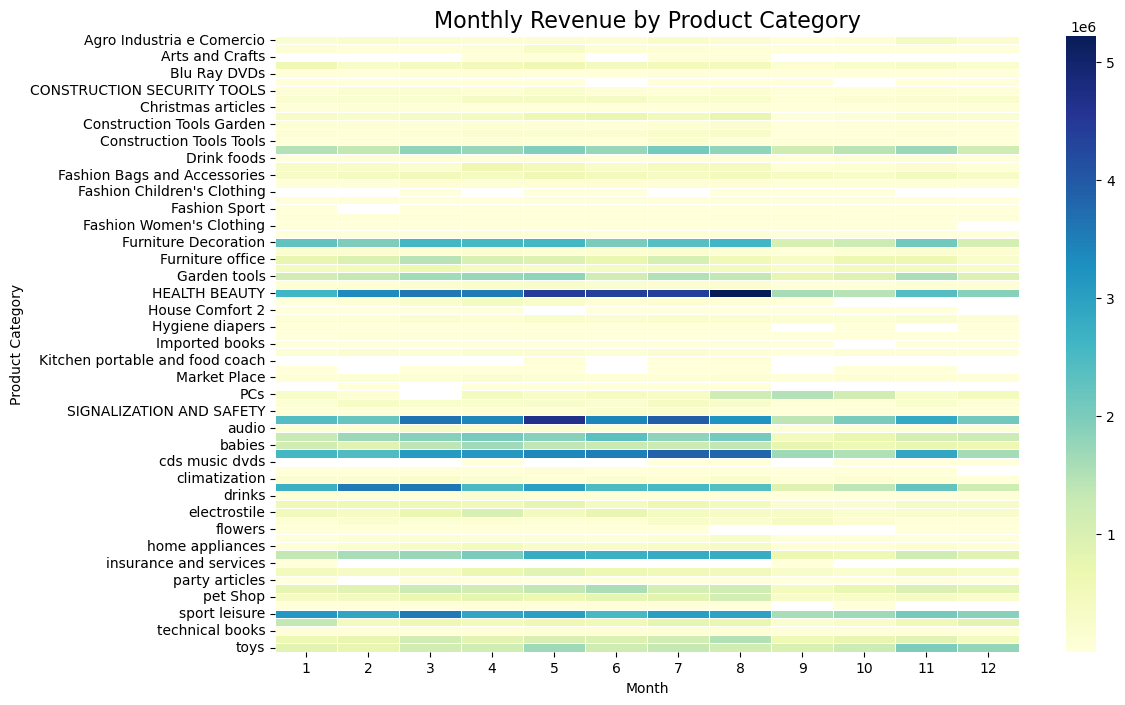

In [5]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
SELECT 
    p.product_category,
    YEAR(o.order_purchase_timestamp) AS order_year,
    MONTH(o.order_purchase_timestamp) AS order_month,
    round(SUM(oi.price + oi.freight_value), 2) AS total_revenue
FROM order_items oi
JOIN orders o 
    ON oi.order_id = o.order_id
JOIN products p 
    ON oi.product_id = p.product_id
GROUP BY 
    p.product_category,
    YEAR(o.order_purchase_timestamp),
    MONTH(o.order_purchase_timestamp)
ORDER BY 
    p.product_category,
    order_year,
    order_month;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

orders = pd.read_sql("SELECT * FROM orders", conn)
order_items = pd.read_sql("SELECT * FROM order_items", conn)
products = pd.read_sql("SELECT * FROM products", conn)

# Step 1: Merge datasets
merged_df = (
    order_items.merge(orders, on='order_id')
               .merge(products, on='product_id')
)

# Step 2: Extract year and month
merged_df['order_year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year
merged_df['order_month'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.month

# Step 3: Calculate monthly revenue by category (including freight)
monthly_revenue = (
    merged_df.groupby(['product_category', 'order_year', 'order_month'])
    .agg(total_revenue=('price', 'sum'), freight_revenue=('freight_value', 'sum'))
    .reset_index()
)

# Combine total price and freight
monthly_revenue['total_revenue'] = monthly_revenue['total_revenue'] + monthly_revenue['freight_revenue']

# Step 4: Pivot data for heatmap (rows: category, columns: month)
heatmap_data = monthly_revenue.pivot_table(
    index='product_category',
    columns='order_month',
    values='total_revenue',
    aggfunc='sum'
)

# Step 5: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Monthly Revenue by Product Category', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.show()



# (2)Build a revenue heatmap showing monthly revenue by product category.

In [8]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
    WITH MonthlyCategorySales AS (
    -- CTE 1: Calculate Total Revenue for each Product Category per Month
    SELECT
        p.product_category,
        -- Extract the Month (as a number)
        DATEPART(MONTH, o.order_purchase_timestamp) AS Sale_Month,
        -- Calculate total sales (price + freight)
        SUM(oi.price + oi.freight_value) AS Monthly_Revenue
    FROM
        orders o
    INNER JOIN
        order_items oi ON o.order_id = oi.order_id
    INNER JOIN
        products p ON oi.product_id = p.product_id
    GROUP BY
        p.product_category,
        DATEPART(MONTH, o.order_purchase_timestamp)
)
-- Final SELECT: Pivot the data to get Months as Columns
-- Note: SQL Server (SSMS) requires hardcoding the month numbers for the pivot columns.
SELECT
    product_category,
    -- Pivot the Monthly_Revenue into 12 columns
    SUM(CASE WHEN Sale_Month = 1 THEN Monthly_Revenue ELSE 0 END) AS Month_01_Revenue,
    SUM(CASE WHEN Sale_Month = 2 THEN Monthly_Revenue ELSE 0 END) AS Month_02_Revenue,
    SUM(CASE WHEN Sale_Month = 3 THEN Monthly_Revenue ELSE 0 END) AS Month_03_Revenue,
    SUM(CASE WHEN Sale_Month = 4 THEN Monthly_Revenue ELSE 0 END) AS Month_04_Revenue,
    SUM(CASE WHEN Sale_Month = 5 THEN Monthly_Revenue ELSE 0 END) AS Month_05_Revenue,
    SUM(CASE WHEN Sale_Month = 6 THEN Monthly_Revenue ELSE 0 END) AS Month_06_Revenue,
    SUM(CASE WHEN Sale_Month = 7 THEN Monthly_Revenue ELSE 0 END) AS Month_07_Revenue,
    SUM(CASE WHEN Sale_Month = 8 THEN Monthly_Revenue ELSE 0 END) AS Month_08_Revenue,
    SUM(CASE WHEN Sale_Month = 9 THEN Monthly_Revenue ELSE 0 END) AS Month_09_Revenue,
    SUM(CASE WHEN Sale_Month = 10 THEN Monthly_Revenue ELSE 0 END) AS Month_10_Revenue,
    SUM(CASE WHEN Sale_Month = 11 THEN Monthly_Revenue ELSE 0 END) AS Month_11_Revenue,
    SUM(CASE WHEN Sale_Month = 12 THEN Monthly_Revenue ELSE 0 END) AS Month_12_Revenue
FROM
    MonthlyCategorySales
GROUP BY
    product_category
ORDER BY
    product_category;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

orders_df = pd.read_sql("SELECT * FROM orders", conn)
order_items_df = pd.read_sql("SELECT * FROM order_items", conn)
products_df = pd.read_sql("SELECT * FROM products", conn)


# --- 1. Data Loading and Preparation (Equivalent to SQL Joins) ---

# Ensure timestamp is datetime and calculate total revenue
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
order_items_df['Total_Revenue'] = order_items_df['price'] + order_items_df['freight_value']

# Join the necessary tables: orders, order_items, and products
sales_detail_df = pd.merge(orders_df[['order_id', 'order_purchase_timestamp']],
                           order_items_df[['order_id', 'product_id', 'Total_Revenue']],
                           on='order_id', how='inner')

sales_detail_df = pd.merge(sales_detail_df,
                           products_df[['product_id', 'product_category']],
                           on='product_id', how='inner')

# Extract Month (as an integer)
sales_detail_df['Sale_Month'] = sales_detail_df['order_purchase_timestamp'].dt.month


# --- 2. Aggregation and Pivoting (Equivalent to SQL CTE and Pivot) ---

# Aggregate total revenue by category and month
monthly_category_sales = sales_detail_df.groupby(['product_category', 'Sale_Month']).agg(
    Monthly_Revenue=('Total_Revenue', 'sum')
).reset_index()

# Pivot the table to get months as columns (This creates the matrix for the heatmap)
# The index will be 'product_category', columns will be 'Sale_Month' (1 to 12), and values will be 'Monthly_Revenue'
revenue_matrix = monthly_category_sales.pivot(
    index='product_category',
    columns='Sale_Month',
    values='Monthly_Revenue'
)

# Replace any missing months (NaN) with 0 for the visualization
revenue_matrix = revenue_matrix.fillna(0)


print("\n--- Revenue Matrix Head ---")
print(revenue_matrix.head(10))


--- Revenue Matrix Head ---
Sale_Month                              1          2          3          4   \
product_category                                                              
Agro Industria e Comercio        172915.29  226549.71  180300.06  129158.82   
Art                               77333.67   42142.41   24367.50   74795.67   
Arts and Crafts                       0.00       0.00       0.00     923.94   
Bags Accessories                 611362.62  267842.70  399201.48  510618.87   
Blu Ray DVDs                       3898.26    2112.21   55434.78   46818.27   
CITTE AND UPHACK FURNITURE        34300.80   18669.96   15793.11    3531.60   
CONSTRUCTION SECURITY TOOLS       65468.52  176827.59  167819.58   92555.19   
Casa Construcao                  182467.08  184160.25  202110.66  336681.36   
Christmas articles                29820.42   72126.45   32245.83   16538.85   
Construction Tools Construction  299384.64  284548.41  354770.01  420572.52   

Sale_Month            

#  Perform a seller performance analysis — revenue, number of orders, and average order value (visualize using Seaborn)

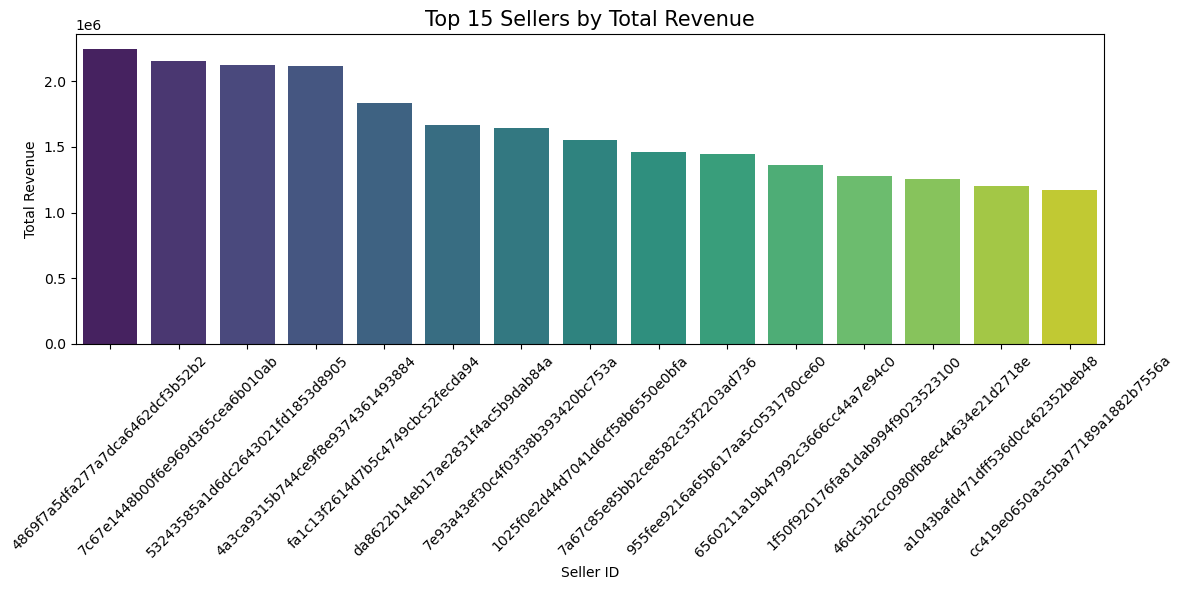

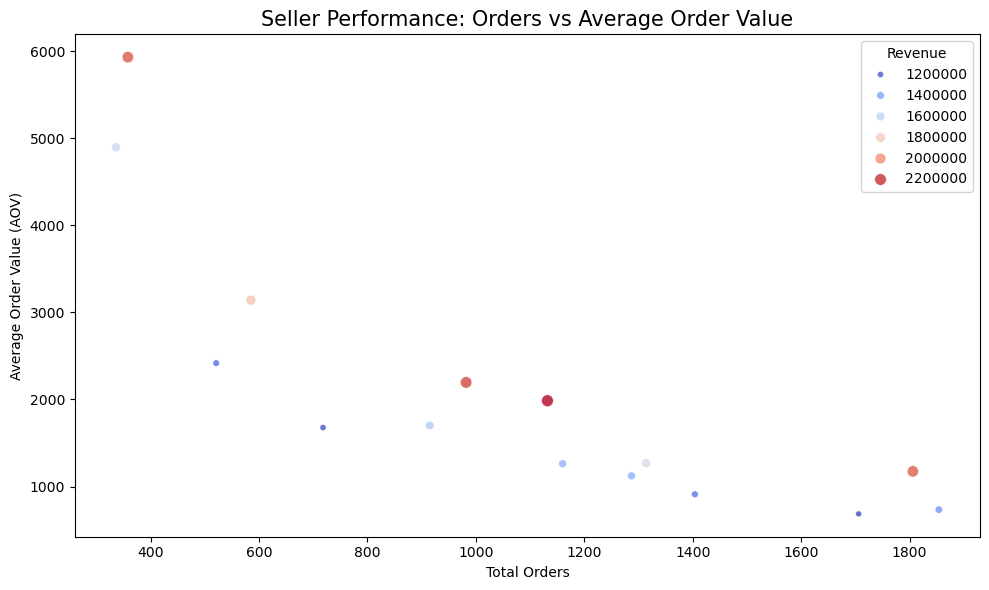

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
    SELECT 
    oi.seller_id,
    COUNT(DISTINCT oi.order_id) AS total_orders,
    SUM(oi.price + oi.freight_value) AS total_revenue,
    Round((SUM(oi.price + oi.freight_value) / COUNT(DISTINCT oi.order_id)),2) AS avg_order_value
FROM order_items oi
JOIN orders o 
    ON oi.order_id = o.order_id
GROUP BY oi.seller_id
ORDER BY total_revenue DESC;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

orders = pd.read_sql("SELECT * FROM orders", conn)
order_items = pd.read_sql("SELECT * FROM order_items", conn)

# Step 1: Merge necessary datasets
merged_df = order_items.merge(orders, on='order_id')

# Step 2: Calculate total revenue per seller
seller_perf = (
    merged_df.groupby('seller_id')
    .agg(
        total_orders=('order_id', 'nunique'),
        total_price=('price', 'sum'),
        total_freight=('freight_value', 'sum')
    )
    .reset_index()
)

# Step 3: Derive total revenue and average order value
seller_perf['total_revenue'] = seller_perf['total_price'] + seller_perf['total_freight']
seller_perf['avg_order_value'] = (seller_perf['total_revenue'] / seller_perf['total_orders']).round(2)

# Step 4: Sort by revenue (Top 15 sellers)
top_sellers = seller_perf.sort_values(by='total_revenue', ascending=False).head(15)

# Step 5: Visualization 1 — Revenue by Seller
plt.figure(figsize=(12, 6))
sns.barplot(data=top_sellers, x='seller_id', y='total_revenue', palette='viridis')
plt.title('Top 15 Sellers by Total Revenue', fontsize=15)
plt.xlabel('Seller ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Visualization 2 — Average Order Value vs Total Orders
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_sellers,
    x='total_orders',
    y='avg_order_value',
    size='total_revenue',
    hue='total_revenue',
    palette='coolwarm',
    alpha=0.8
)
plt.title('Seller Performance: Orders vs Average Order Value', fontsize=15)
plt.xlabel('Total Orders')
plt.ylabel('Average Order Value (AOV)')
plt.legend(title='Revenue', loc='upper right')
plt.tight_layout()
plt.show()


# Identify the top 5 customers who contributed the most revenue in each year.

In [2]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=Haroon;"
    "DATABASE=Project;"
    "Trusted_Connection=yes;"
)

query = """
    WITH CustomerYearlyRevenue AS (
        SELECT
        o.customer_id,
        DATEPART(YEAR, o.order_purchase_timestamp) AS Sale_Year,
        SUM(oi.price + oi.freight_value) AS Total_Revenue
    FROM  orders o
    INNER JOIN
        order_items oi ON o.order_id = oi.order_id
    GROUP BY  o.customer_id, DATEPART(YEAR, o.order_purchase_timestamp)
),
RankedCustomers AS (    
    SELECT
        Sale_Year,
        customer_id,
        Total_Revenue,
        RANK() OVER (PARTITION BY Sale_Year ORDER BY Total_Revenue DESC) AS Revenue_Rank
    FROM  CustomerYearlyRevenue
)
SELECT Sale_Year, Revenue_Rank, customer_id, Total_Revenue
FROM  RankedCustomers
WHERE Revenue_Rank <= 5 -- Filter for the top 5 ranks
ORDER BY  Sale_Year, Revenue_Rank ;
"""

# Load SQL result into DataFrame
import warnings
warnings.filterwarnings('ignore')

orders_df = pd.read_sql("SELECT * FROM orders", conn)
order_items_df = pd.read_sql("SELECT * FROM order_items", conn)

# Step 1: Join and Prepare Data
# ---------------------------------------------------------------------

# Ensure timestamp is datetime and calculate total revenue
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
order_items_df['Total_Revenue'] = order_items_df['price'] + order_items_df['freight_value']

# Join orders (for customer_id and date) and order_items (for revenue)
customer_sales_detail = pd.merge(
    orders_df[['order_id', 'customer_id', 'order_purchase_timestamp']],
    order_items_df[['order_id', 'Total_Revenue']],
    on='order_id',
    how='inner'
)

# Extract the Year
customer_sales_detail['Sale_Year'] = customer_sales_detail['order_purchase_timestamp'].dt.year


# Step 2: Aggregate to get Yearly Customer Revenue
# ---------------------------------------------------------------------
# Group by both year and customer_id
customer_yearly_revenue = customer_sales_detail.groupby(['Sale_Year', 'customer_id']).agg(
    Total_Revenue=('Total_Revenue', 'sum')
).reset_index()


# Step 3: Identify the Top 5 Customers in each Year (Top N Per Group)
# ---------------------------------------------------------------------
# The nlargest(5) function is applied to the 'Total_Revenue' column within each 'Sale_Year' group.
def get_top_n_customers(group):
    """Returns the top 5 customers from a single year group based on Total_Revenue."""
    return group.nlargest(5, 'Total_Revenue')

top_5_customers_yearly = customer_yearly_revenue.groupby('Sale_Year').apply(
    get_top_n_customers
).reset_index(drop=True) 


# Step 4: Add Rank and Final Display
# ---------------------------------------------------------------------
# Calculate the rank within the final result set for clear presentation
top_5_customers_yearly['Revenue_Rank'] = (
    top_5_customers_yearly.groupby('Sale_Year')['Total_Revenue']
    .rank(method='dense', ascending=False)
    .astype(int)
)

# Select and display the final result columns
final_result = top_5_customers_yearly[['Sale_Year', 'Revenue_Rank', 'customer_id', 'Total_Revenue']]

print(final_result.sort_values(by=['Sale_Year', 'Revenue_Rank']))

    Sale_Year  Revenue_Rank                       customer_id  Total_Revenue
0        2016             1  a9dc96b027d1252bbac0a9b72d837fc6       12811.95
1        2016             2  1d34ed25963d5aae4cf3d7f3a4cda173       12606.66
2        2016             3  4a06381959b6670756de02e07b83815f       11050.02
3        2016             4  1fc56719b52f82c03caddc5faf531fbb        8841.69
4        2016             5  85f0e92957e9fb9c5f72ba5378f492a0        8819.19
5        2017             1  1617b1357756262bfa56ab541c47bc16      122976.72
6        2017             2  c6e2731c5b391845f6800c97401a43a9       62363.79
7        2017             3  3fd6777bbce08a352fddd04e4a7cc8f6       60539.94
8        2017             4  05455dfa7cd02f13d132aa7a6a9729c6       54733.86
9        2017             5  df55c14d1476a9a3467f131269c2477f       44553.06
10       2018             1  ec5b2ba62e574342386871631fafd3fc       65473.92
11       2018             2  f48d464a0baaea338cb25f816991ab1f       62299.89